In [1]:
# REMEMBER TO RESTART KERNEL BEFORE RUNNING THIS NOTEBOOK #



#---------------------------------------------------------#

# execute all the exploring printing?
print_all_the_stuff = False

# save figures to .png when running notebook?
save_fig_again = False



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# read file and print basic information 
with open('arbejdsmarkedsanalyse_koen_alder.csv','r') as file:
    koen_alder_df = pd.read_csv(file, delimiter = ';')
            


In [3]:
# print basic information
if print_all_the_stuff:
    print(koen_alder_df.info())
    print(koen_alder_df.head(3))

In [4]:
# print all topic labels
if print_all_the_stuff:
    koen_alder_df['Topic Label'].unique()

In [5]:
# print all question labels
if print_all_the_stuff:    
    koen_alder_df['Question Label'].unique()

In [6]:
# remove empty/non-important coloumns
df = koen_alder_df.drop(['Farveskala', 'Gennemsnit', 'Score (Indekseret score) (gennemsnit) (label)','Score (Indekseret score) (gennemsnit)'],axis=1)

# convert to readable decimal numbers
df['Score']=[float(x.replace(',','.')) for x in df['Score'] ]
df['Score (Indekseret score)']=[float(x.replace(',','.')) for x in df['Score (Indekseret score)'] ]

if print_all_the_stuff:
    print(df.info())

In [7]:
# making life easier by renaming frequently used categories
top = 'Topic Label'
ques = 'Question Label'
spm = 'Ordforklaring'
score = 'Score'
group = 'Group'
unit = 'Akse'
id_score = 'Score (Indekseret score)'

**Fysisk og psykisk helbred og arbejdsmiljø**

In [8]:
# questions in the Arbejdsevne topic
df[df[top] == 'Arbejdsevne'][ques].unique()

array(['Psykisk arbejdsevne', 'Fysisk arbejdsevne', 'Arbejdsevne'],
      dtype=object)

In [9]:
# group normalized score data by group and questions
arb_evne = df[df[top] == 'Arbejdsevne'].groupby([group, ques])[id_score].mean()
arb_evne_spm = df[df[top] == 'Arbejdsevne'][spm].unique()

# print questions and scoring information
[print(x) for x in df[df[top]=='Mentalt helbred'][spm].unique()]

Spørgsmål: En samlet score for vitalitet

-0-100

Scoren er beregnet som et gennemsnit af tre spørgsmål. Ved hvert spørgsmål er der seks svarkategorier, der hver angiver en score mellem 0 og 100. Jo højere score desto højere vitalitet.
Spørgsmål: Samlet score for mental sundhed

-0-100

Scoren er beregnet som et gennemsnit af fire spørgsmål. Ved hvert spørgsmål er der seks svarkategorier, der hver angiver en score mellem 0 og 100. Jo højere score desto højere mental sundhed.


[None, None]

In [10]:
[print(x) for x in df[df[top]=='Helbred'][spm].unique()]

Spørgsmål: Hvordan synes du, at dit helbred er alt i alt?

- 1. Dårligt
- 2. Mindre godt
- 3. Godt
- 4. Vældig godt
- 5. Fremragende

I resultaterne præsenteres den gennemsnitlige score (1-5).


[None]

In [11]:
for l in arb_evne_spm:
    print(l)

Spørgsmål: Hvordan vurderer du din nuværende arbejdsevne i forhold til de psykiske krav i dit arbejde?

- 1. Dårlig
- 2. Nogenlunde
- 3. God
- 4. Særdeles god
- 5. Fremragende

I resultaterne præsenteres den gennemsnitlige score (1-5).
Spørgsmål: Hvordan vurderer du din nuværende arbejdsevne i forhold til de fysiske krav i dit arbejde?

- 1. Dårlig
- 2. Nogenlunde
- 3. God
- 4. Særdeles god
- 5. Fremragende

I resultaterne præsenteres den gennemsnitlige score (1-5).
Spørgsmål: Forestil dig, at din arbejdsevne er 10 point værd, når den er bedst. Hvor mange point vil du give din nuværende arbejdsevne?

-0 ~ Ude af stand til at arbejde
-1
-2
-3
-4
- 5
-6
-7
-8
-9
-10 ~ Bedste arbejdsevne

I resultaterne præsenteres den gennemsnitlige score (0-10).


In [12]:
# actual data

In [13]:
arb_evne.groupby([group,ques]).head()

Group                Question Label     
Kvinder              Arbejdsevne            83.205973
                     Fysisk arbejdsevne     77.998636
                     Psykisk arbejdsevne    74.057827
Kvinder, 18 - 24 år  Arbejdsevne            81.366671
                     Fysisk arbejdsevne     80.883213
                     Psykisk arbejdsevne    76.164964
Kvinder, 25 - 34 år  Arbejdsevne            80.555814
                     Fysisk arbejdsevne     80.060497
                     Psykisk arbejdsevne    72.496127
Kvinder, 35 - 44 år  Arbejdsevne            83.784265
                     Fysisk arbejdsevne     79.209839
                     Psykisk arbejdsevne    73.995172
Kvinder, 45 - 54 år  Arbejdsevne            84.738837
                     Fysisk arbejdsevne     78.002418
                     Psykisk arbejdsevne    75.005153
Kvinder, 55 - 64 år  Arbejdsevne            83.685136
                     Fysisk arbejdsevne     73.219642
                     Psykisk arbejdsevne 

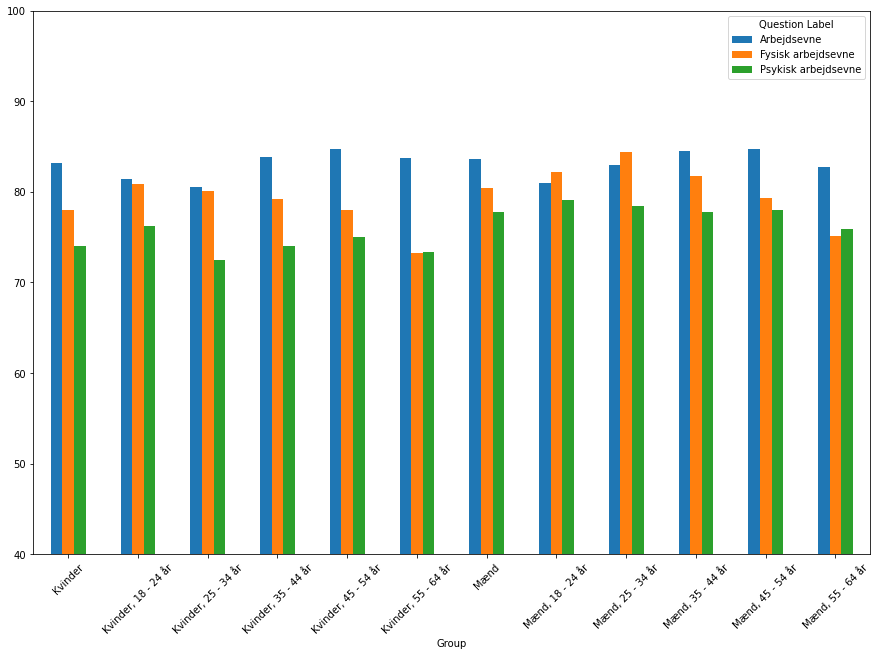

In [14]:
# plot data
fig1 = arb_evne.groupby([ques, group]).mean().unstack(0).plot.bar(ylim=(40,100),figsize=(15,10), rot=45).get_figure()

In [15]:
# save figure
if save_fig_again:
    fig1.savefig('fig1.png')

In [16]:
# look at health and mental health data
helbred_tot = df[(df[top] == 'Helbred')  | (df[top] == 'Mentalt helbred')].groupby([group,ques])[id_score].mean()


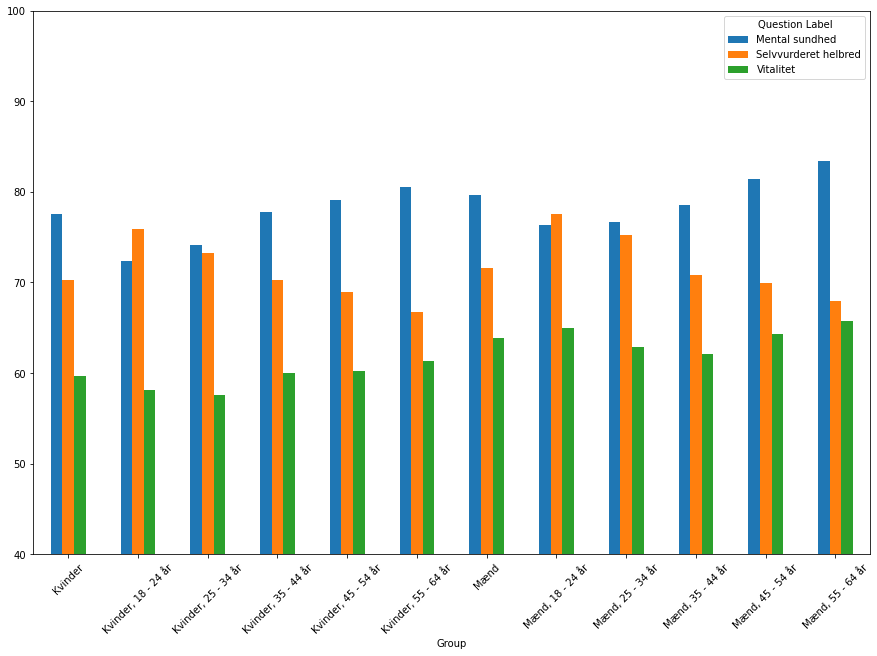

In [17]:
# plot data
fig2 = helbred_tot.groupby([ques, group]).mean().unstack(0).plot.bar(ylim=(40,100),figsize=(15,10), rot=45).get_figure()

In [18]:
# save figure
if save_fig_again:
    fig2.savefig('fig2.png')

**Bonus:
Why are people so depressed? (Hint: it's a trap)** 

In [19]:
# why are people so depressed?
df[df[top]=='Depressive symptomer'].head(10)

,Group,Question Label,Topic Label,Year,Akse,Ordforklaring,Antpers,Score (Indekseret score),Score
180,"Mænd, 55 - 64 år",Depressive symptomer,Depressive symptomer,2018,Score,Spørgsmål: Samlet score for depressive symptom...,5101,13.163605,6.581802
181,"Mænd, 45 - 54 år",Depressive symptomer,Depressive symptomer,2018,Score,Spørgsmål: Samlet score for depressive symptom...,5394,14.858322,7.429161
182,"Mænd, 35 - 44 år",Depressive symptomer,Depressive symptomer,2018,Score,Spørgsmål: Samlet score for depressive symptom...,3523,17.247654,8.623827
183,"Mænd, 25 - 34 år",Depressive symptomer,Depressive symptomer,2018,Score,Spørgsmål: Samlet score for depressive symptom...,1892,19.932200,9.966100
184,"Mænd, 18 - 24 år",Depressive symptomer,Depressive symptomer,2018,Score,Spørgsmål: Samlet score for depressive symptom...,599,18.968089,9.484045
185,Mænd,Depressive symptomer,Depressive symptomer,2018,Score,Spørgsmål: Samlet score for depressive symptom...,16509,16.528759,8.264379
186,"Kvinder, 55 - 64 år",Depressive symptomer,Depressive symptomer,2018,Score,Spørgsmål: Samlet score for depressive symptom...,5628,15.844001,7.922001
187,"Kvinder, 45 - 54 år",Depressive symptomer,Depressive symptomer,2018,Score,Spørgsmål: Samlet score for depressive symptom...,6442,17.599932,8.799966
188,"Kvinder, 35 - 44 år",Depressive symptomer,Depressive symptomer,2018,Score,Spørgsmål: Samlet score for depressive symptom...,4291,19.143993,9.571996
189,"Kvinder, 25 - 34 år",Depressive symptomer,Depressive symptomer,2018,Score,Spørgsmål: Samlet score for depressive symptom...,2315,23.613089,11.806545


In [24]:
# it's a trap

df[df[top]=='Depressive symptomer'][spm].unique()

lool = df[df[unit] == 'Score'][spm].unique()

lol = []
for i in range(len(lool)):
    try:
        lol.append(lool[i].split('\n')[-1])
    except AttributeError:
        print(lool[i])
        
lol = set(lol)

# because the depression score is between 0-50

for lo in lol:
    print(lo)
    
    


I resultaterne præsenteres den gennemsnitlige score (0-10).
Scoren er beregnet som et gennemsnit af tre spørgsmål. Ved hvert spørgsmål er der seks svarkategorier, der hver angiver en score mellem 0 og 100. Jo højere score desto højere vitalitet.
Scoren er beregnet som et gennemsnit af fire spørgsmål.
I resultaterne præsenteres den gennemsnitlige score (0-4).
Scoren er beregnet som et gennemsnit af fire spørgsmål. Ved hvert spørgsmål er der seks svarkategorier, der hver angiver en score mellem 0 og 100. Jo højere score desto højere mental sundhed.
I resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).
I resultaterne præsenteres den gennemsnitlige score (1-5).
I resultaterne præsenteres den gennemsnitlige score (1-4). Personer, der har svaret 'Ikke relevant' (svarkategori 5), er ikke taget med i beregningerne.
I resultaterne præsenteres den gennemsnitlige score (1-4). Personer, der har svaret 'Ved ikke' (svarkategori 5), er ikke taget med i beregningerne.
Sco

In [22]:
# exploring scores, USE ID_SCORE!!!
yolo = df.groupby([top, ques, unit])[id_score].mean()

yolo.head(30)

Topic Label                                   Question Label                                               Akse     
Angstsymptomer                                Symptomer på angst                                           Score        24.524231
Arbejdsevne                                   Arbejdsevne                                                  Score        83.068427
                                              Fysisk arbejdsevne                                           Score        79.366055
                                              Psykisk arbejdsevne                                          Score        75.993910
Arbejdspladsens prioritering af arbejdsmiljø  Arbejdsmiljøet skal være bedre end reglerne kræver           Score        54.764954
                                              Arbejdsmiljøproblemer skal forebygges                        Score        58.989835
                                              Medarbejderne inddrages i beslutninger om eget arbejdsmil

In [23]:
df.groupby([top, ques, unit, group])[score].mean()

Topic Label      Question Label      Akse       Group              
Angstsymptomer   Symptomer på angst  Score      Kvinder                1.361456
                                                Kvinder, 18 - 24 år    1.661077
                                                Kvinder, 25 - 34 år    1.556993
                                                Kvinder, 35 - 44 år    1.320905
                                                Kvinder, 45 - 54 år    1.269871
                                                                         ...   
Vold og trusler  Trusler             Andel (%)  Mænd, 18 - 24 år       8.211130
                                                Mænd, 25 - 34 år       6.504098
                                                Mænd, 35 - 44 år       5.902177
                                                Mænd, 45 - 54 år       5.221695
                                                Mænd, 55 - 64 år       5.193775
Name: Score, Length: 1308, dtype: float64